In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge,Lasso,LassoCV,RidgeCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
ad = pd.read_csv("/Users/juhimishra/Downloads/DSData-master 2/Advertising.csv")
ad.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


This data main motive is to know company should invest in which segment so that there sales will increase along with  type of customers and market they should grab to increase their sales and distribution in such areas. Let's see through our EDA and insight what we get from this data 


# EDA

Let's check the shape of data

In [3]:
ad.shape

(200, 5)

total rows are 200 and column 5

In [5]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Here we can see that unnamed column consist no such information which will help us in our prediction to sales. So to avoid
unnecessary outliers or skewness removing thi column using drop method

In [13]:
ad.drop(columns = ['Unnamed: 0'],inplace = True)

Let's check static data for the same using describe method 

In [14]:
ad.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


From the above summary we can observe that there are no missing values in data as all the columns are having 200 data present same we got in our shape method. so no need to treat for missing values.
Also can see that there are chances of all the columns follows normal distribution. Same will check with the help of Visualization
technique

In [16]:
# Checking duplicates in data
ad.duplicated().any()

False

In [17]:
# Checking Null values
ad.isna().sum().to_frame("any missing value")

,any missing value
TV,0
radio,0
newspaper,0
sales,0


With the help of isna method we come across that there are no missing values in our data.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

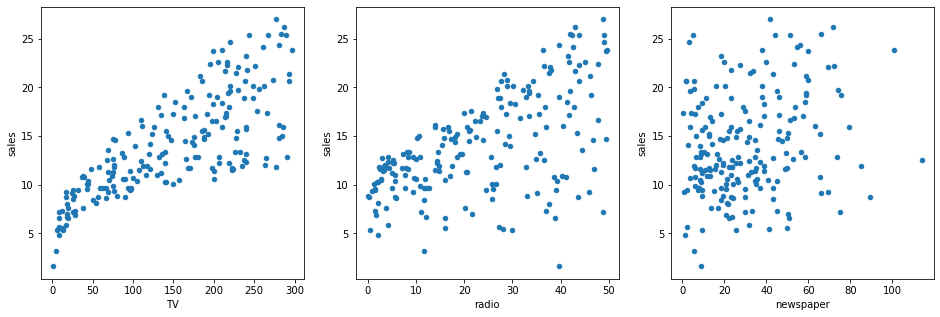

In [32]:
#Viszualize the relationship between the features and the response using scatterplots
fig,axs = plt.subplots(1,3)

ad.plot(kind ='scatter', x = 'TV',y='sales',ax = axs[0], figsize = (16,5))
ad.plot(kind='scatter', x ='radio',y='sales', ax= axs[1])
ad.plot(kind ='scatter',x = 'newspaper', y ='sales', ax=axs[2])

from above scatter plot clearly we can see that sales and tv are having strong positive correaltion as and when investement 
in tv increases sales is moving upward direction. Similarly Radio and Sales are also showing some positive relation but not as 
strong as tv . While newspaper and sales are not at all correlated to each other.

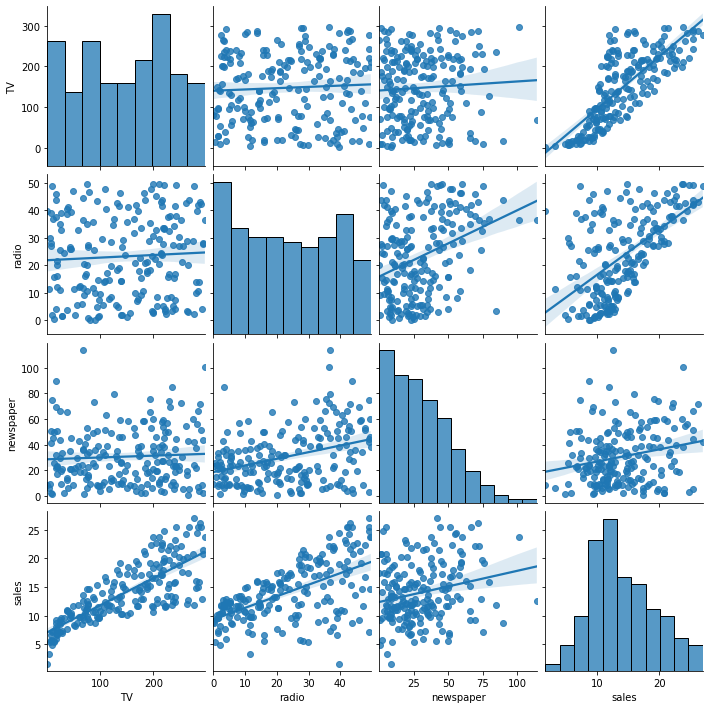

In [36]:
sns.pairplot(ad,kind = 'reg')

With the helpof pairplot too getting the same insight that investing in newspaper is not helpful for company as there is relation at all between newspaper and sales.

relplot means relation between two columns. here we are comparing on x axis TV and on y axis Sales for more clarity.

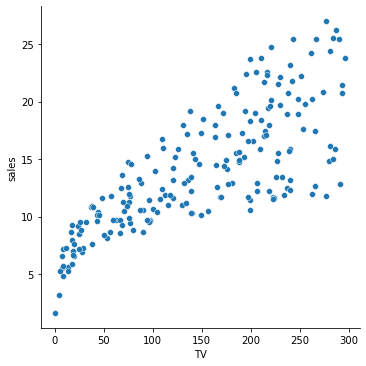

In [39]:
sns.relplot(x = 'TV', y = 'sales', data = ad)

strong positive relation between TV and sales 

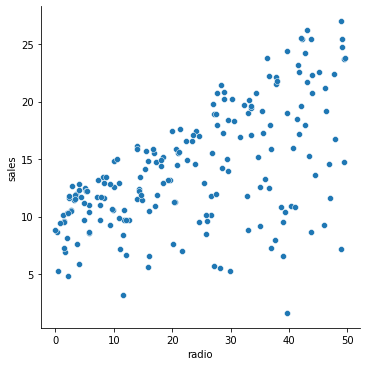

In [40]:
sns.relplot(x = 'radio', y = 'sales', data = ad)

Positive relation between radio and sales

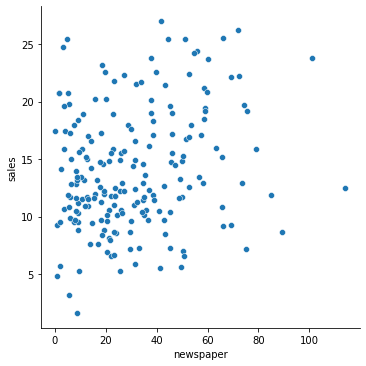

In [41]:
sns.relplot(x = 'newspaper', y = 'sales', data = ad)

With the hep of relational plot too we got the same result so finally decided that if company invest in newspaper that will
completely be a loss for them.

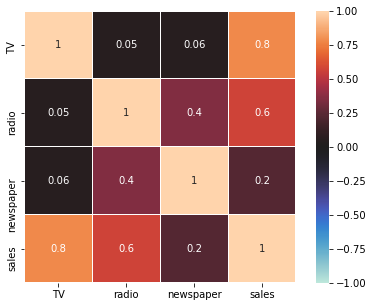

In [44]:
# Checking correlation with the help of heatmap
corr = ad.corr().abs()
plt.figure(figsize = (7,5))
sns.heatmap(corr, vmin = -1,vmax = 1,annot=True,
           square = True,center = 0, fmt = '.1g',linewidths = .1,)
plt.show()


In [51]:
ad.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


From the above heatmap and correlation value we can see that radio and newspaper are having multicollinearity since between newspaper and radio radio is having higher value so dropping newspaper to avoid multicollinearity issue

In [52]:
ad.drop(columns = ['newspaper'],inplace = True)

In [53]:
ad

,TV,radio,sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9
...,...,...,...
195,38.2,3.7,7.6
196,94.2,4.9,9.7
197,177.0,9.3,12.8
198,283.6,42.0,25.5


In [54]:
ad.skew()

TV      -0.069853
radio    0.094175
sales    0.407571
dtype: float64

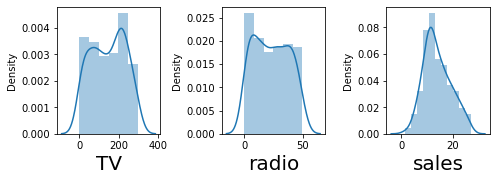

In [57]:
plt.figure(figsize = (7,7),facecolor = 'white')
plotnumber = 1

for column in ad:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(ad[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()

From above distplot we come across that there are no skewness in data as all columns are normally distributed and within the range of -+5. we can procees further to check outliers in data or not

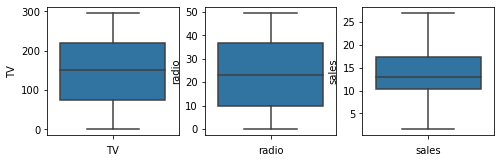

In [58]:
# Let's check outliers 
plt.figure(figsize=(8,8))

graph=1

for column in ad.columns:
    if graph<=9:
        ax = plt.subplot(3,3,graph)
        sns.boxplot(y=ad[column],orient='v') #orientation = v means vertical and if h that means horizontal
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

our feature seems to completely normal no need to treat anything even for outliers. we can proceed for preprocessing method

# Preprocessing Method

In [60]:
# Splitting x and y as feature and target respectively
x = ad.drop(columns = ['sales'])
y = ad['sales']

In [61]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler

array([[ 0.96985227,  0.98152247],
       [-1.19737623,  1.08280781],
       [-1.51615499,  1.52846331],
       [ 0.05204968,  1.21785493],
       [ 0.3941822 , -0.84161366],
       [-1.61540845,  1.73103399],
       [-1.04557682,  0.64390467],
       [-0.31343659, -0.24740632],
       [-1.61657614, -1.42906863],
       [ 0.61604287, -1.39530685],
       [-0.94515567, -1.17923146],
       [ 0.79002835,  0.04969734],
       [-1.4390876 ,  0.79920886],
       [-0.57850171, -1.05768905],
       [ 0.66625345,  0.65065703],
       [ 0.56466461,  1.65000572],
       [-0.92530498,  0.9004942 ],
       [ 1.56887609,  1.10306488],
       [-0.90895735, -0.18663512],
       [ 0.0030068 ,  0.04294498],
       [ 0.8332328 ,  0.29953451],
       [ 1.05509347, -1.22649795],
       [-1.5628625 , -0.4972435 ],
       [ 0.94883389, -0.42971994],
       [-0.98952781, -0.72007125],
       [ 1.35285385, -1.33453565],
       [-0.04837147,  0.40757221],
       [ 1.08662104, -0.44322465],
       [ 1.18820988,

# Finding best random state

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
maxscore = 0
maxrs = 0

for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.30,random_state = i)
    dt = DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred = dt.predict(x_test)
    rsc = r2_score(y_test,pred)
    if rsc>maxscore:
        maxscore=rsc
        maxrs=i
print("Best r2 score is:",maxscore,"On Random state: ",maxrs)

Best r2 score is: 0.9842294483794806 On Random state:  138


In [65]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.30,random_state=i)

giving training size as 70% and test size as 30% for making our model understand

In [66]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(r2_score(y_test,pred))

0.8771480004936367


In [68]:
print(cross_val_score(lr,x_scaler,y,cv=5).mean())

0.889282957306453


In [69]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print(r2_score(y_test,pred))

0.9732295014315374


In [70]:
print(cross_val_score(dt,x_scaler,y,cv=5).mean())

0.9593653343819005


In [72]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(r2_score(y_test,pred))

0.981093753942341


In [73]:
print(cross_val_score(rf,x_scaler,y,cv=5).mean())

0.9785165752000466


### Checking whether my model is overfitting model or not using lasso and ridge

In [86]:
lassocv = LassoCV(alphas = None, max_iter=1000, normalize = True)
lassocv.fit(x_train,y_train)

LassoCV(normalize=True)

In [87]:
alpha = lassocv.alpha_
alpha

0.00032340706716278884

In [88]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.00032340706716278884)

In [89]:
lasso_reg.score(x_test,y_test)

0.8771320072118507

In [92]:
ridgecv = RidgeCV(alphas =(0.1,1.0,10.0),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), normalize=True)

In [93]:
alpha = ridgecv.alpha_
alpha

0.1

In [94]:
ridge_reg = Ridge(alpha)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.1)

In [95]:
ridge_reg.score(x_test,y_test)

0.8770248095368851

As there is not much difference in linearregression, lasso and ridge score so my model is not an overfitting model.

# Hyperparameter Tuning

In [96]:
# RandomForestRegressor
param = {'n_estimators':[100,700],
        'criterion':['mse','mae'],
        'max_depth':[2,3,4,5,6],
        'max_features':['auto','sqrt','log2']}

In [97]:
GC = GridSearchCV(rf,param,cv=5)

In [98]:
GC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 700]})

In [99]:
GC.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 700}

In [100]:
final_rf = RandomForestRegressor(criterion = 'mse',max_depth = 6, max_features = 'auto',n_estimators = 700)
final_rf.fit(x_train,y_train)
pred = final_rf.predict(x_test)
score = r2_score(y_test,pred)
print(score*100)

98.10879345884177


# Saving the model

In [102]:
import joblib
joblib.dump(final_rf,'FinalmodelAdvertisment.pk1')

['FinalmodelAdvertisment.pk1']